<a href="https://colab.research.google.com/github/Taryn-Cail/Python-Group-Project-2704/blob/main/data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 2704 Group Project

## Jackson McIntyre, Nicolas Serrano and Taryn Cail

This project analyzes the relationship between students GPA and study hours per day.

## Importing necessary libraries.

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import statsmodels.api as sm
from scipy.stats import pearsonr
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, classification_report
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

## Loading the data into a dataframe.

In [4]:
#Load the data set with only the required columns
df = pd.read_csv('student_lifestyle_dataset.csv') #Reading the file into the df
df = df[['Student_ID', 'Study_Hours_Per_Day', 'GPA', 'Extracurricular_Hours_Per_Day', 'Sleep_Hours_Per_Day', 'Social_Hours_Per_Day', 'Physical_Activity_Hours_Per_Day']]
print(df) # Printing the entire dataset

      Student_ID  Study_Hours_Per_Day   GPA  Extracurricular_Hours_Per_Day  \
0              1                  6.9  2.99                            3.8   
1              2                  5.3  2.75                            3.5   
2              3                  5.1  2.67                            3.9   
3              4                  6.5  2.88                            2.1   
4              5                  8.1  3.51                            0.6   
...          ...                  ...   ...                            ...   
1995        1996                  6.5  3.32                            0.2   
1996        1997                  6.3  2.65                            2.8   
1997        1998                  6.2  3.14                            0.0   
1998        1999                  8.1  3.04                            0.7   
1999        2000                  9.0  3.58                            1.7   

      Sleep_Hours_Per_Day  Social_Hours_Per_Day  \
0           

## Grouping the various GPA numbers into new sections called Low, Med and High

In [5]:
#Grouping GPA into various levels
def categorize_gpa(gpa):
  if gpa <= 2.85:
    return 'Low'
  elif gpa > 2.85 and gpa <= 3.35:
    return 'Med'
  elif gpa > 3.35:
    return 'High'

#Create new column for GPA groups with the new groups in it (Low, Med, High)
df['GPA Level'] = df['GPA'].apply(categorize_gpa)
print(df)

      Student_ID  Study_Hours_Per_Day   GPA  Extracurricular_Hours_Per_Day  \
0              1                  6.9  2.99                            3.8   
1              2                  5.3  2.75                            3.5   
2              3                  5.1  2.67                            3.9   
3              4                  6.5  2.88                            2.1   
4              5                  8.1  3.51                            0.6   
...          ...                  ...   ...                            ...   
1995        1996                  6.5  3.32                            0.2   
1996        1997                  6.3  2.65                            2.8   
1997        1998                  6.2  3.14                            0.0   
1998        1999                  8.1  3.04                            0.7   
1999        2000                  9.0  3.58                            1.7   

      Sleep_Hours_Per_Day  Social_Hours_Per_Day  \
0           

## Calculate mean Study Hours per day for the various GPA groups

In [6]:
# Declaring the order
gpa_order = ['Low', 'Med', 'High']

# groupby() groups by col and resetindex() converts back into data
gpa_by_studyH = df.groupby('GPA Level')['Study_Hours_Per_Day'].mean().reset_index()

# Placing the categories visually in the correct order (ie. Low, Med, High)
gpa_by_studyH['GPA Level'] = pd.Categorical(gpa_by_studyH['GPA Level'], categories=gpa_order,ordered=True)

# Sorting the values
gpa_by_studyH = gpa_by_studyH.sort_values('GPA Level')

# Printing the new table
print(gpa_by_studyH)

  GPA Level  Study_Hours_Per_Day
1       Low             6.041422
2       Med             7.414488
0      High             8.898913


## Creating a Bar Graph

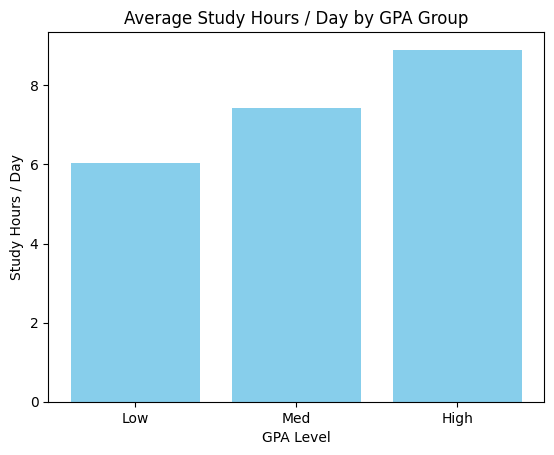

In [7]:
#Visualize - bar graph
plt.clf()
plt.bar(gpa_by_studyH['GPA Level'], gpa_by_studyH['Study_Hours_Per_Day'], color='skyblue')
plt.xlabel("GPA Level")
plt.ylabel("Study Hours / Day")
plt.title("Average Study Hours / Day by GPA Group")
plt.savefig("bar_graph.svg", format="svg", bbox_inches="tight")
plt.show()

## Creating a Scatter Plot

[]

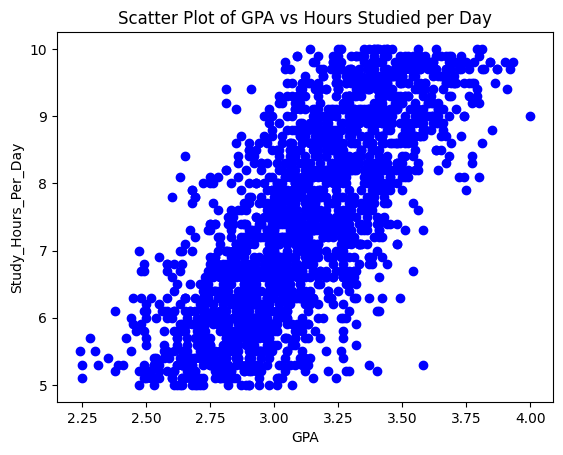

In [8]:
#Visualize - scatter plot
plt.clf()
plt.scatter(df['GPA'], df['Study_Hours_Per_Day'], color='blue', marker='o')
plt.xlabel('GPA')
plt.ylabel('Study_Hours_Per_Day')
plt.title('Scatter Plot of GPA vs Hours Studied per Day')
plt.savefig("scatter_plot.svg", format="svg", bbox_inches="tight")
plt.plot()

## Creating a Heatmap

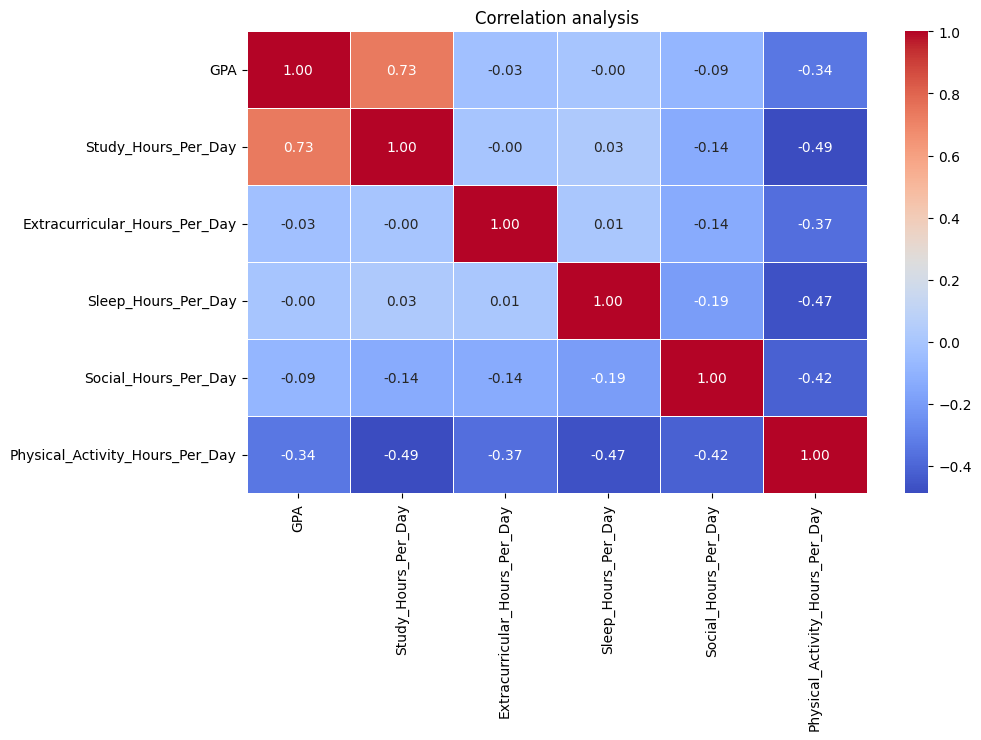

In [9]:
#Visualize - heatmap
correltaion_data = df[['GPA','Study_Hours_Per_Day', 'Extracurricular_Hours_Per_Day', 'Sleep_Hours_Per_Day', 'Social_Hours_Per_Day', 'Physical_Activity_Hours_Per_Day']]
corr_matrix = correltaion_data.corr()
plt.figure(figsize=(10,6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation analysis")
plt.savefig("heatmap.svg", format="svg", bbox_inches="tight")
plt.show()


## Calculating the P-Value and Pearson Correlation Coefficient

In [10]:
x = stats.pearsonr(df['Study_Hours_Per_Day'], df['GPA'])
print(x)

PearsonRResult(statistic=np.float64(0.7344679806560517), pvalue=np.float64(0.0))


In [11]:
# Perform Pearson correlation test
r, p_value = stats.pearsonr(df['Study_Hours_Per_Day'], df['GPA'])

# Print Results
print(f"Pearson correlation coefficient: {r:.4f}")
print(f"P-value: {p_value:.4f}")

Pearson correlation coefficient: 0.7345
P-value: 0.0000


A positive r value indicates a positive relationship between study hours per day and GPA. When r exceeds 0.7, it signifies a strong positive linear correlation.

Additionally, a p-value belo 0.05 confirms statistical significance.

Based on our results, we can reject the null hypothesis and conclude that increased study hours are associated with higher GPA.

## Creating a Simple Linear Regression Model

Mean Squared Error (MSE): 0.04
R² Score: 0.55
Coefficient (slope): 0.153
Intercept: 1.969


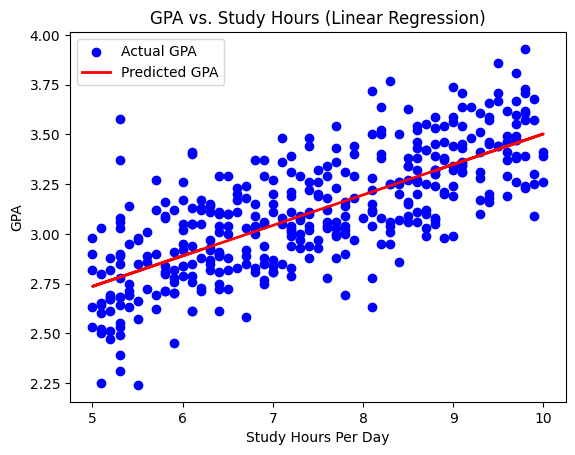

In [12]:
#Predictive Model: Simple Linear Regression

#Prepare Data
X = df[['Study_Hours_Per_Day']]
y = df['GPA']

#Split data into Training/Test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Train the model
model = LinearRegression()
model.fit(X_train, y_train)

#Evaluate the model
#Predict on test data
y_pred = model.predict(X_test)

#Calculate performance metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R² Score: {r2:.2f}")  # Closer to 1 is better

#Interpret results
print(f"Coefficient (slope): {model.coef_[0]:.3f}") # Example output: Coefficient: 0.145 means each additional study hour increases GPA by 0.145 points (on average).
print(f"Intercept: {model.intercept_:.3f}") # This is the predicted GPA when study hours = 0.

#Visualize Predictions
plt.scatter(X_test, y_test, color='blue', label='Actual GPA')
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Predicted GPA')
plt.xlabel('Study Hours Per Day')
plt.ylabel('GPA')
plt.title('GPA vs. Study Hours (Linear Regression)')
plt.legend()
plt.savefig("linear_regression.svg", format="svg", bbox_inches="tight")

# Print the figure
plt.show()


## Testing the Simple Linear Regression Model with our own values

In [13]:
# Example list of study hours per day
study_hours_list = [0, 2, 4, 6, 8, 10]  # You can change or expand this list

# Format data for prediction
study_hours = [[hrs] for hrs in study_hours_list]

# Get predictions from the model
predicted_gpas = model.predict(study_hours)

# Display results
for i, hrs in enumerate(study_hours_list):
    print(f"Predicted GPA for {hrs} hours/day: {predicted_gpas[i]:.2f}")

print("\n")


Predicted GPA for 0 hours/day: 1.97
Predicted GPA for 2 hours/day: 2.28
Predicted GPA for 4 hours/day: 2.58
Predicted GPA for 6 hours/day: 2.89
Predicted GPA for 8 hours/day: 3.20
Predicted GPA for 10 hours/day: 3.50




/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


# Testing the accuracy of the predictions of the Simple Linear Regression Model

In [14]:
# Hours of study
y_true = [2.5, 3.0, 3.8, 2.9, 3.6]

# Predicted GPA values (from your model)
y_pred = model.predict([[0], [2], [4], [6], [8]])

# Evaluation metrics
mae = mean_absolute_error(y_true, y_pred)
mse = mean_squared_error(y_true, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_true, y_pred)

print(f"Mean Absolute Error : {mae:.2f}")
print("\n")

Mean Absolute Error : 0.58




/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


## Making a Linear Discriminate Analysis Model

In [15]:
#Making Linear Discriminate Analysis as a predictive model

# Select only study hours as the predictor
X = df[['Study_Hours_Per_Day']]
y = df['GPA Level']  # Categorical target (Low/Med/High)

# Split data (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)

y_pred = lda.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.67

Classification Report:
               precision    recall  f1-score   support

        High       0.66      0.59      0.62        94
         Low       0.65      0.51      0.57        88
         Med       0.68      0.77      0.72       218

    accuracy                           0.67       400
   macro avg       0.66      0.62      0.64       400
weighted avg       0.67      0.67      0.67       400



## Testing the Linear Discriminant Model with our own values

In [16]:
# List of study hours per day
std_hrs_list = [0, 2, 4, 6, 8, 10]

input_data = [[hrs] for hrs in std_hrs_list]

# Get predictions
predicted_gpa_levels = lda.predict(input_data)
probabilities = lda.predict_proba(input_data)

# Display results
for i, std_hrs in enumerate(std_hrs_list):
    print(f"\nFor {std_hrs} study hours/day:")
    print(f"Predicted GPA Level: {predicted_gpa_levels[i]}")

print("\n")



For 0 study hours/day:
Predicted GPA Level: Low

For 2 study hours/day:
Predicted GPA Level: Low

For 4 study hours/day:
Predicted GPA Level: Low

For 6 study hours/day:
Predicted GPA Level: Med

For 8 study hours/day:
Predicted GPA Level: Med

For 10 study hours/day:
Predicted GPA Level: High




/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearDiscriminantAnalysis was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearDiscriminantAnalysis was fitted with feature names
  warnings.warn(


## Testing whether Study Hours is the sole affector for the GPA values

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearDiscriminantAnalysis was fitted with feature names
  warnings.warn(


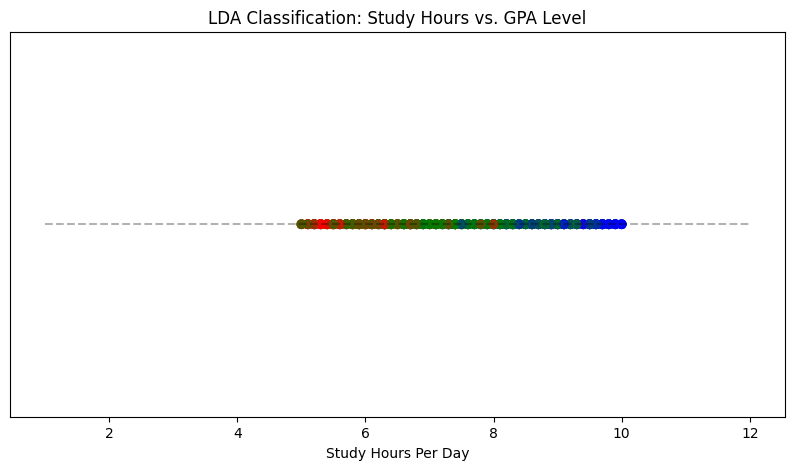

In [17]:
#Visual decision boundaries

# Create a range of study hours (1-12 hrs)
study_hours_range = np.linspace(1, 12, 500).reshape(-1, 1)

# Predict GPA levels for these hours
gpa_predictions = lda.predict(study_hours_range)

# Plot
plt.figure(figsize=(10, 5))
plt.scatter(X_train, [0] * len(X_train), c=y_train.map({'Low': 'red', 'Med': 'green', 'High': 'blue'}), alpha=0.3)
plt.plot(study_hours_range, [0] * len(study_hours_range), c='black', linestyle='--', alpha=0.3)
plt.yticks([])
plt.xlabel('Study Hours Per Day')
plt.title('LDA Classification: Study Hours vs. GPA Level')
plt.savefig("lda_classification.svg", format="svg", bbox_inches="tight")
plt.show()

The heavy overlap shows that study hours per day may not be the sole determinant for GPA levels.

# Feature Engineering based on Sleep Hours (<8 hours vs >=8 hours)

In [18]:
# Split the dataset based on Sleep Hours
sleep8ormore = df[df['Sleep_Hours_Per_Day'] >= 8]
sleeplessthan8 = df[df['Sleep_Hours_Per_Day'] < 8]

# Optional: Print or further analyze the two groups
print("Students sleeping 8 or more hours:\n", sleep8ormore)
print("\nStudents sleeping less than 8 hours:\n", sleeplessthan8)


Students sleeping 8 or more hours:
       Student_ID  Study_Hours_Per_Day   GPA  Extracurricular_Hours_Per_Day  \
0              1                  6.9  2.99                            3.8   
1              2                  5.3  2.75                            3.5   
2              3                  5.1  2.67                            3.9   
5              6                  6.0  2.85                            2.1   
9             10                  7.7  2.76                            0.7   
...          ...                  ...   ...                            ...   
1990        1991                  8.6  3.26                            3.8   
1992        1993                  7.5  3.04                            2.1   
1993        1994                  7.1  2.85                            1.4   
1994        1995                  7.9  3.08                            3.4   
1996        1997                  6.3  2.65                            2.8   

      Sleep_Hours_Per_Day  

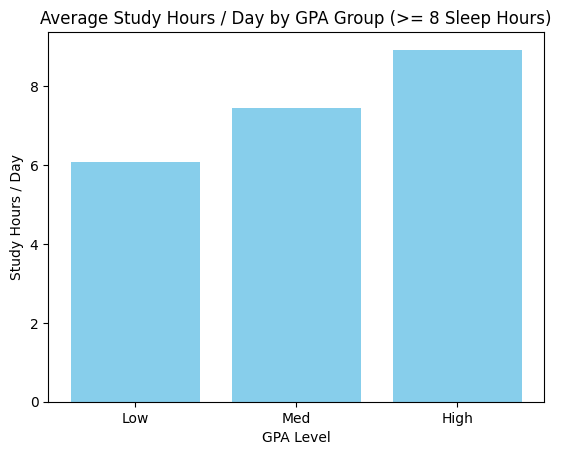

In [30]:
#Visualize - bar graph of >= 8 hours
gpa_by_studyH = sleep8ormore.groupby('GPA Level')['Study_Hours_Per_Day'].mean().reset_index()

# Placing the categories visually in the correct order (ie. Low, Med, High)
gpa_by_studyH['GPA Level'] = pd.Categorical(gpa_by_studyH['GPA Level'], categories=gpa_order,ordered=True)

# Sorting the values
gpa_by_studyH = gpa_by_studyH.sort_values('GPA Level')

plt.clf()
plt.bar(gpa_by_studyH['GPA Level'], gpa_by_studyH['Study_Hours_Per_Day'], color='skyblue')
plt.xlabel("GPA Level")
plt.ylabel("Study Hours / Day")
plt.title("Average Study Hours / Day by GPA Group (>= 8 Sleep Hours)")
plt.savefig("bar_graph more than 8 hours.svg", format="svg", bbox_inches="tight")
plt.show()

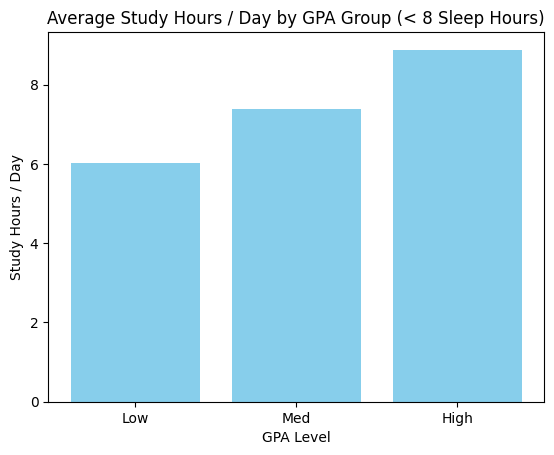

In [31]:
#Visualize - bar graph of < 8 hours
gpa_by_studyH = sleeplessthan8.groupby('GPA Level')['Study_Hours_Per_Day'].mean().reset_index()

# Placing the categories visually in the correct order (ie. Low, Med, High)
gpa_by_studyH['GPA Level'] = pd.Categorical(gpa_by_studyH['GPA Level'], categories=gpa_order,ordered=True)

# Sorting the values
gpa_by_studyH = gpa_by_studyH.sort_values('GPA Level')

plt.clf()
plt.bar(gpa_by_studyH['GPA Level'], gpa_by_studyH['Study_Hours_Per_Day'], color='skyblue')
plt.xlabel("GPA Level")
plt.ylabel("Study Hours / Day")
plt.title("Average Study Hours / Day by GPA Group (< 8 Sleep Hours)")
plt.savefig("bar_graph less than 8 hours.svg", format="svg", bbox_inches="tight")
plt.show()

[]

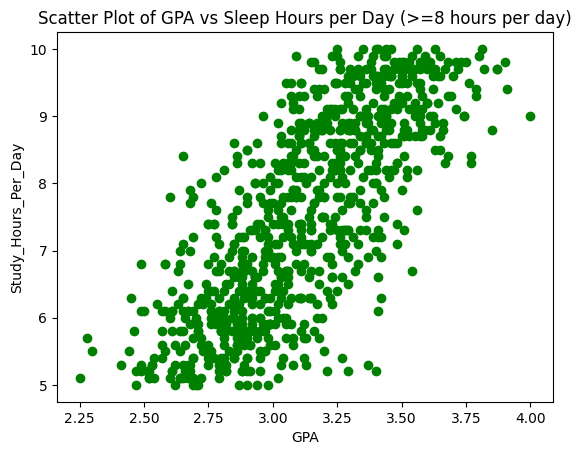

In [32]:
#Visualize - scatter plot of >= 8 hours
plt.clf()
plt.scatter(sleep8ormore['GPA'], sleep8ormore['Study_Hours_Per_Day'], color='green', marker='o')
plt.xlabel('GPA')
plt.ylabel('Study_Hours_Per_Day')
plt.title('Scatter Plot of GPA vs Sleep Hours per Day (>=8 hours per day)')
plt.savefig("scatter_plot more than 8 hours.svg", format="svg", bbox_inches="tight")
plt.plot()

[]

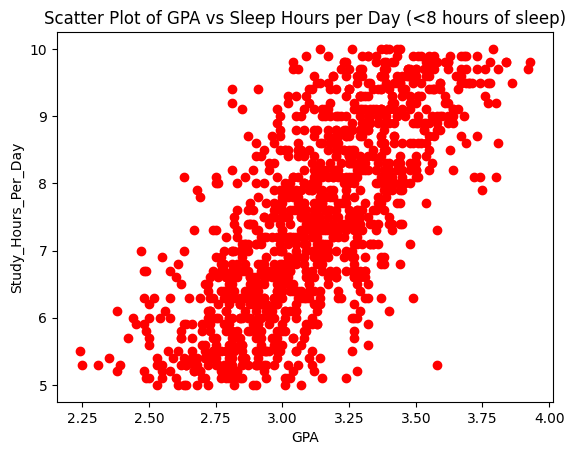

In [33]:
#Visualize - scatter plot of < 8 hours
plt.clf()
plt.scatter(sleeplessthan8['GPA'], sleeplessthan8['Study_Hours_Per_Day'], color='red', marker='o')
plt.xlabel('GPA')
plt.ylabel('Study_Hours_Per_Day')
plt.title('Scatter Plot of GPA vs Sleep Hours per Day (<8 hours of sleep)')
plt.savefig("scatter_plot less than 8 hours.svg", format="svg", bbox_inches="tight")
plt.plot()

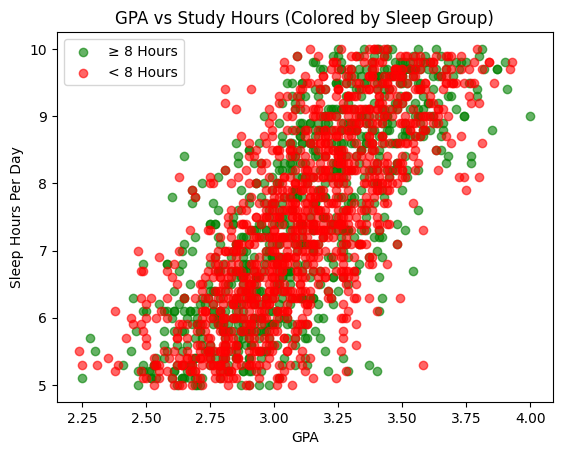

In [34]:
# Dual Scatter Plot
plt.clf()
plt.scatter(sleep8ormore['GPA'], sleep8ormore['Study_Hours_Per_Day'], color='green', label='≥ 8 Hours', alpha=0.6)
plt.scatter(sleeplessthan8['GPA'], sleeplessthan8['Study_Hours_Per_Day'], color='red', label='< 8 Hours', alpha=0.6)
plt.xlabel('GPA')
plt.ylabel('Sleep Hours Per Day')
plt.title('GPA vs Study Hours (Colored by Sleep Group)')
plt.legend()
plt.savefig("scatter_colored_sleep.svg", format="svg", bbox_inches="tight")
plt.show()


<ipython-input-24-8f0294d58fba>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Sleep Group', y='GPA', data=df, palette='pastel')


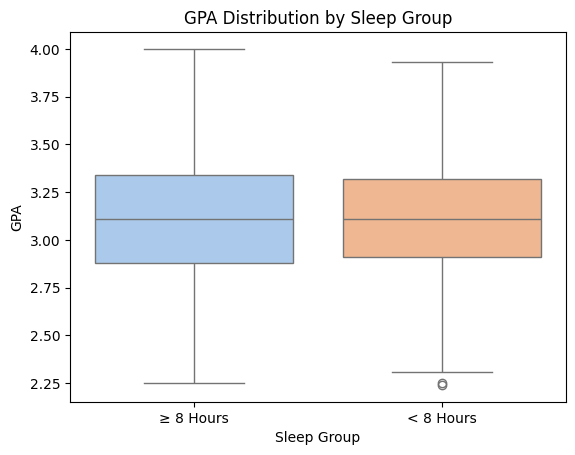

In [24]:
# Add a new column for Sleep Group
df['Sleep Group'] = df['Sleep_Hours_Per_Day'].apply(lambda x: '≥ 8 Hours' if x >= 8 else '< 8 Hours')

plt.clf()
sns.boxplot(x='Sleep Group', y='GPA', data=df, palette='pastel')
plt.title('GPA Distribution by Sleep Group')
plt.savefig("gpa_sleep_boxplot.svg", format="svg", bbox_inches="tight")
plt.show()